# Project: Investigate a Dataset (TMDB Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

***

<a id='intro'></a>
## Introduction
TMDB dataset is a big dataset that contains different information like (popularity, user ratings, budget, revenue, releas date, etc..) about more than 10000 movies collected from tmdb, in this notebook we will go through the data analysis process of this dataset, trying to answer some questions and find patterns and correlations between different variables.
#### Important Note
Due to a wide missing of data in two important columns ```budget``` & ```revenue```, we will have to perform two separate analyses based on two separate datasets.

The first dataset will drop all rows with missing values in the ```budget``` & ```revenue``` columns, which means reducing the number of observations to only **3854**, The analysis of this dataset will focus on the correlation between budget or revenue with other featuers.

The second dataset will drop the entire two columns of ```budget``` & ```revenue```, which means keeping the original number of observations after dropping nulls and duplicates, the analysis of this dataset will focus on correlation between other features like popularity, genres, and runtime.  

This entire process is [documented](#important_note) in the next section..

### Questions for  ```budget``` and ```revenue```  analysis:
1. Is there a correlation between budget and revenue?
2. Have the movies revenues increased over the years?

### Questions for other movies features analysis:



1. Which year has the most released movies?
2. What are the most common genres in high rated movies?
3. What are the most common genres in low rated movies? 
4. Is there a correlation between runtime and average user rating?

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [1]:
# Import needed libraries
# Load the data
import pandas as pd 
import numpy as np
import plotly as ply
import plotly.graph_objs as go
import plotly.express as px

df = pd.read_csv('tmdb-movies.csv')

In [2]:
# Looking at the raw data..
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# Inspect data types and missing values..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Check for duplicates
sum(df.duplicated())

1

In [5]:
# Check release_date type
df['release_date'].dtype

dtype('O')

<a id='important_note'></a>

In [6]:
# Show summary statistics:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

The previous summary staistics shows that there are missing values that are recorded as```Zero```s ..

* more than 25% of the values in the ```budget``` column
* more than 50% of the values in the ```revenue``` column
* at least one value in the ```runtime``` column

Dropping all these missing values will cause a huge loss of information about other features..

In order to solve this problem we will have to seperate the dataset into two datasets:

The first dataset will drop all rows with missing values in the ```budget``` & ```revenue``` columns, which means reducing the number of rows to less than the half.

The second dataset will drop the entire two columns of ```budget``` & ```revenue```, which means keeping the  original number of rows.

Now lets check for missing values in ```runtime``` column to see if it's appropriate to drop them or not..

In [7]:
# there is a '0' recorded as a miniumum runtime, which means it's a missing value..
# Inspecting how many rows have '0' recoeded in 'runtime' column
df.query('runtime == 0').shape[0]

31

Dropping 31 rows from the dataset will not affect the quality of the analysis.

***
### Data Cleaning
* Drop unnecessary columns
* Drop duplicates
* Fixing ```release_date``` format and type
* Drop Nulls
* Fixing ```genres``` format
* Split the dataset into two datasets:
    1. Drop columns with missing data
    2. Drop rows with missing data



In [8]:
# Drop unnecessary columns..
df = df.drop(['imdb_id', 'homepage', 'tagline', 'keywords','overview', 'budget_adj', 'revenue_adj', 'cast', 'director','production_companies'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 933.9+ KB


In [9]:
# Drop Duplicates
df.drop_duplicates(inplace = True)

In [10]:
# Fixing release_date data type:
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
# Drop Nulls..
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10842 non-null  int64         
 1   popularity      10842 non-null  float64       
 2   budget          10842 non-null  int64         
 3   revenue         10842 non-null  int64         
 4   original_title  10842 non-null  object        
 5   runtime         10842 non-null  int64         
 6   genres          10842 non-null  object        
 7   release_date    10842 non-null  datetime64[ns]
 8   vote_count      10842 non-null  int64         
 9   vote_average    10842 non-null  float64       
 10  release_year    10842 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 1016.4+ KB


<a id='genres'></a>

***

Now, In order to fix ```genres``` format, we need to do some steps:
1. set ```id``` as index
2. create a new dataframe from splitting the values of ```geners``` into columns
3. use pd.stack() to stack the genres columns into rows
4. join the new genres dataframe with the original dataframe on ```id```

In [12]:
# Fix 'genres' format:
## Set 'id' as index:
df.set_index('id', inplace = True)

In [13]:
## Create a new dataframe splitting genres into columns:
genres_df = df['genres'].str.split("|", expand = True)
genres_df.head()

0                1                2         3     4
id                                                                 
135397     Action        Adventure  Science Fiction  Thriller  None
76341      Action        Adventure  Science Fiction  Thriller  None
262500  Adventure  Science Fiction         Thriller      None  None
140607     Action        Adventure  Science Fiction   Fantasy  None
168259     Action            Crime         Thriller      None  None

In [14]:
# Stacking genres_df columns into rows.. 
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [15]:
# Rename genres column:
genres_df = genres_df.rename(columns = {0 : 'genres_adj'})
genres_df.head(10)

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
262500 0        Adventure
       1  Science Fiction

Later in the analysis section, we will join this ```genres_df``` with the original ```df``` to do the genres part of the analysis
***

In [16]:
# Drop missing values from 'runtime' column..
df = df.query('runtime != 0')

Now let's split our dataset: 

In [17]:
#Create Budget and revenue dataframe by dropping rows with 0 values in budget and revenue columns..
budg_rev_df = df.query('budget != 0').query('revenue != 0')
# Check for updates: 
budg_rev_df.shape

(3854, 10)

In [18]:
#Create features dataframe by dropping budget and revenue 
features_df = df.drop(['budget', 'revenue'], axis = 1)

In [19]:
features_df.describe()

popularity       runtime    vote_count  vote_average  release_year
count  10812.000000  10812.000000  10812.000000  10812.000000  10812.000000
mean       0.648730    102.421846    218.369404      5.975379   2001.288938
std        1.001976     30.871363    576.886018      0.934122     12.819746
min        0.000065      2.000000     10.000000      1.500000   1960.000000
25%        0.209045     90.000000     17.000000      5.400000   1995.000000
50%        0.385298     99.000000     38.000000      6.000000   2006.000000
75%        0.716608    112.000000    146.000000      6.600000   2011.000000
max       32.985763    900.000000   9767.000000      9.200000   2015.000000

<a id='eda'></a>
## Exploratory Data Analysis




## ```budget``` and ```revenue```  analysis:
(Analysis of 3854 observations)

### Is there a correlation between budget and revenue?

Before we check revenue distribution,, let's define  a box plot function to avoid code repeation:

In [20]:
def box_plot(df,y,title):
    '''
    Returns a box plot from dataframe, y axis, and title
    '''
    fig = px.box(df, y = y, title = title, width = 500, height = 800)
    fig.show("svg")

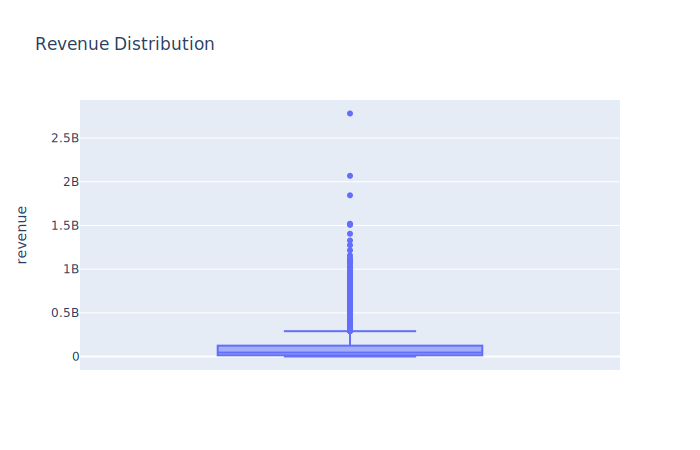

In [21]:
# let's check 'revenue' distribution with box blot..
fig_0 = box_plot(budg_rev_df,'revenue','Revenue Distribution')
fig_0

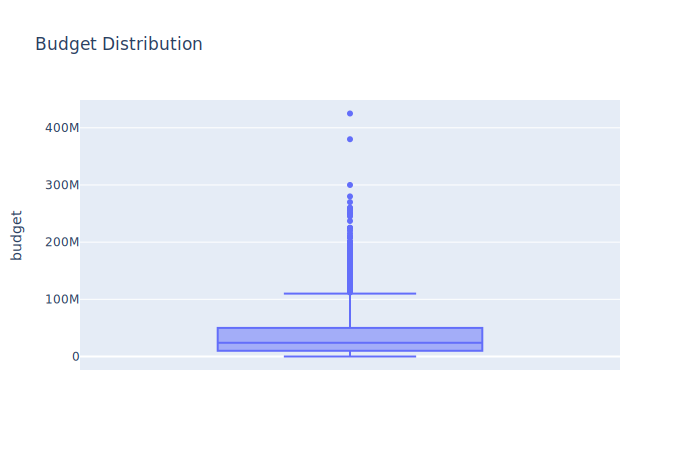

In [22]:
# let's check 'budget' distribution with box blot..
fig_1 = box_plot(budg_rev_df,'budget','Budget Distribution')
fig_1

**Seems like there are some upper outliers..**

The upper outliers are ok to keep since there is no resonable limitation for the maximum values of revenue or budget.

**Although..** the minimum values in both columns are recorded as 2 and 1  dollars, this doesn't make sense.
let's query the ```budg_rev_df``` again to see 5 rows of raw data of revenue values that are less than 10000 dollars for instance. 

In [23]:
#query the budg_rev_df to see 5 rows of raw data of revenue values that are less than 10000 dollars:
budg_rev_df.query('revenue < 10000' or 'budget < 10000').sort_values('revenue').head()

popularity    budget  revenue                  original_title  runtime  \
id                                                                              
13537    0.462609   6000000        2                 Shattered Glass       94   
2293     0.552091   6000000        2                        Mallrats       94   
14301    0.352054    200000        3  Dr. Horrible's Sing-Along Blog       42   
9431     0.578849  15000000        5               Bordello of Blood       87   
24914    0.208637        10        5                     Kid's Story       15   

                                              genres release_date  vote_count  \
id                                                                              
13537                                  Drama|History   2003-11-14          46   
2293                                  Romance|Comedy   1995-10-20         201   
14301  Adventure|Action|Comedy|Science Fiction|Music   2008-07-15         140   
9431                                   Horror|Comedy   1996-08-16          27   
24914                      Science Fiction|Animation   2003-06-02          16   

       vote_average  release_year  
id                                 
13537           6.4          2003  
2293            6.8          1995  
14301           7.7          2008  
9431            4.9          1996  
24914           6.8          2003

<a id='typos'></a>

These values must have been wrongly entered.
let's assure that by some manual search for thier actual values.. 

For example, by checking the movie "Shattered Glass" (with recorded revenue value of 2 dollars) [page](https://www.imdb.com/title/tt0323944/?ref_=fn_al_tt_1) on 'imdb', in the Box office section, it appears that the real value of revenue is more than 2000000 dollars! 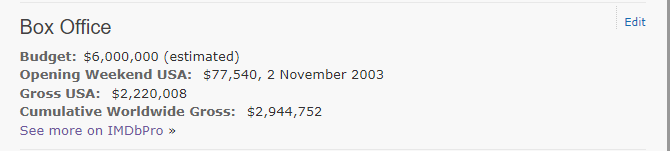

By checking multiple rows with the same problem, it seems that these values are typos that were entered as ones instead of millions, often happend with ```revenue``` and ```budget``` values that are less than 1000.

**The best solution here is trying to obtain the missing or wrongly entered data from another source**
but since we couldn't do that here and now, we can try to do another possible solution

We will create two dataframes, ```low_rev``` for the rows that its revenue is less than 1000, and ```low_budg``` for rows that its budget less than 1000, then fix these values in the new dataframe by multyplying each by 1000000, then append them again to the ```budg_rev_df```, then create a new dataframe ```clean_budg_rev``` that drops typos values from the ```budg_rev_df```

In [24]:
#create a new dataframe 'low_rev' to fix the low revenue values that are less than 1000 dollars: 
low_rev = budg_rev_df[budg_rev_df['revenue'] < 1000]
#multiply the revenue column by 1000000 to fix the issue.
low_rev['revenue'] = low_rev['revenue'] * 1000000
#Append the fixed low revenue dataframe to the original budg_rev_df dataframe:
budg_rev_df = budg_rev_df.append(low_rev)

<ipython-input-24-abe129327c20>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# repeate the same process for the 'budget' column:
low_budg = budg_rev_df[budg_rev_df['budget'] < 1000]
low_budg['budget'] = low_budg['budget'] * 1000000
#Append the fixed low budget dataframe to the original budg_rev_df dataframe:
budg_rev_df = budg_rev_df.append(low_budg)

<ipython-input-25-fddd372d2b81>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# drop the typos values from budg_rev_df and store results in a new frame 'clean_budg_rev':
clean_budg_rev = budg_rev_df[budg_rev_df['revenue'] >= 1000]
clean_budg_rev = clean_budg_rev[clean_budg_rev['budget'] >= 1000]
# Check for updates: 
clean_budg_rev.describe()

popularity        budget       revenue      runtime   vote_count  \
count  3854.000000  3.854000e+03  3.854000e+03  3854.000000  3854.000000   
mean      1.191554  3.737547e+07  1.081010e+08   109.220291   527.720291   
std       1.475162  4.220520e+07  1.764472e+08    19.922820   879.956821   
min       0.001117  6.000000e+03  1.378000e+03    15.000000    10.000000   
25%       0.462368  1.000000e+07  1.401073e+07    95.000000    71.000000   
50%       0.797511  2.400000e+07  4.547220e+07   106.000000   204.000000   
75%       1.368324  5.000000e+07  1.248613e+08   119.000000   580.000000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year  
count   3854.000000   3854.000000  
mean       6.168163   2001.261028  
std        0.794920     11.282575  
min        2.200000   1960.000000  
25%        5.700000   1995.000000  
50%        6.200000   2004.000000  
75%        6.700000   2010.000000  
max        8.400000   2015.000000

In [27]:
# Check the number of rows is still the same as the original dataframe: 
clean_budg_rev.shape[0]

3854

***
**Now, let's go back to our analysis..**

let's check ```revenue``` and ```budget``` distribution with box blot again.. 


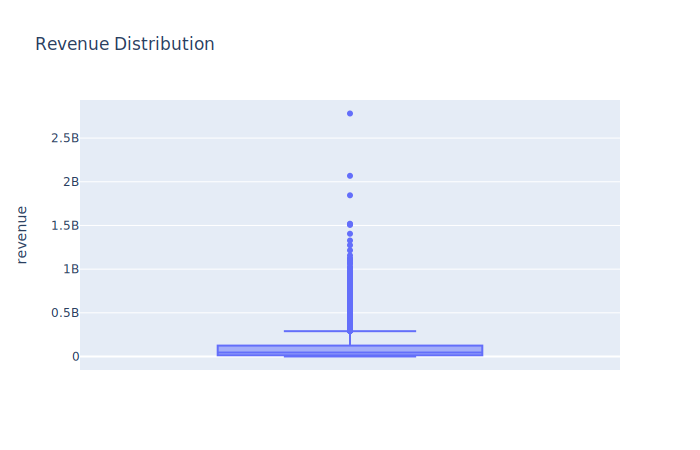

In [28]:
# Creat Box Plot for Revenue Distripution
fig_r = box_plot(clean_budg_rev,'revenue','Revenue Distribution')
fig_r

The distribution of revenue is right skewed.

The median of movies revenue is 45.47 million USD.

50% of the revenue values are between 14 million USD and 124.9 million USD.

There are some upper outliers but they are ok to keep since there are no resonabe limitations to movies revenue values.

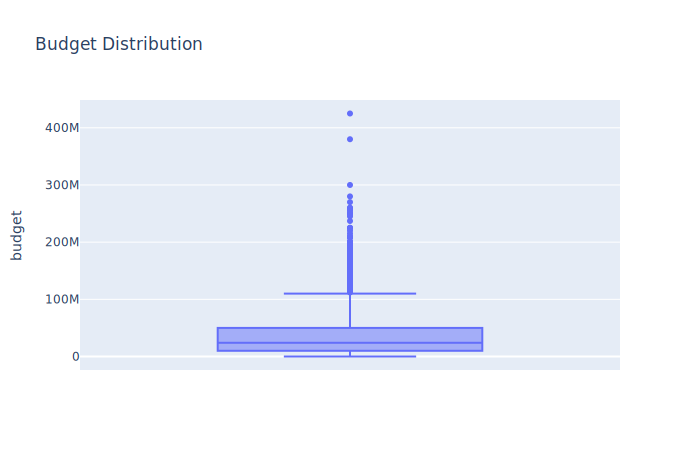

In [29]:
# Creat Box Plot for Budget Distripution
fig_b = box_plot(clean_budg_rev,'budget','Budget Distribution')
fig_b

The distribution of budget is right skewed.

The median of movies budget is 24 million USD.

50% of the budget values are between 10 million USD and 50 million USD.

There are some upper outliers but they are ok to keep since there are no resonabe limitations to movies budget values.
***

Now let's answer our question.. 

**Is there a correlation between budget and revenue?**

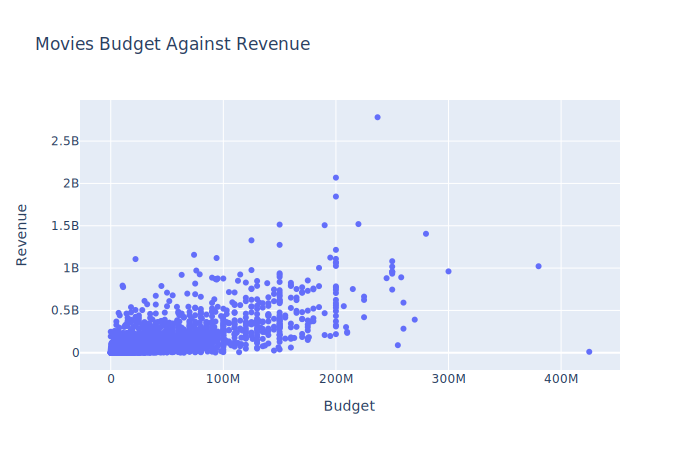

In [30]:
# Checking the correlation between budget and revenue:
fig = go.Figure(data = [go.Scatter(x=clean_budg_rev['budget'], y=clean_budg_rev['revenue'],
                text= clean_budg_rev['original_title'],
                mode='markers')],
                layout = dict(title = 'Movies Budget Against Revenue',
                  xaxis = dict(title = 'Budget', zeroline = False),
                  yaxis = dict(title = 'Revenue')))
fig.show("svg")

**There is no correlation between movies budget and movies revenues.**
***

### Have the movies revenues increased over the years?

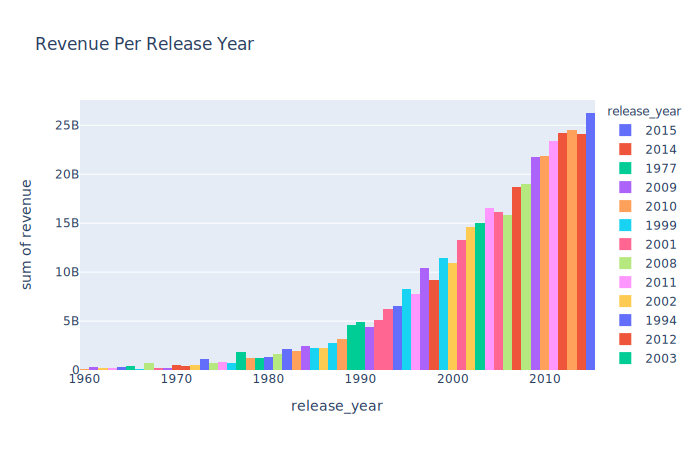

In [31]:
# Showing histogram for movies revenues over the years: 
fig1 = px.histogram(clean_budg_rev, x='release_year', y='revenue',color ='release_year', title = 'Revenue Per Release Year', hover_name = 'original_title')
fig1.show("svg")

**Movies revenues have continuously increased over the years, with HIGHST of 26.20 billion USD for 2015.**
***

## Other movies features analysis:
(Analysis of 10812 observation)

### Which year has the most released movies?

Now we will define a histogram function to avoid repetitive codes: 

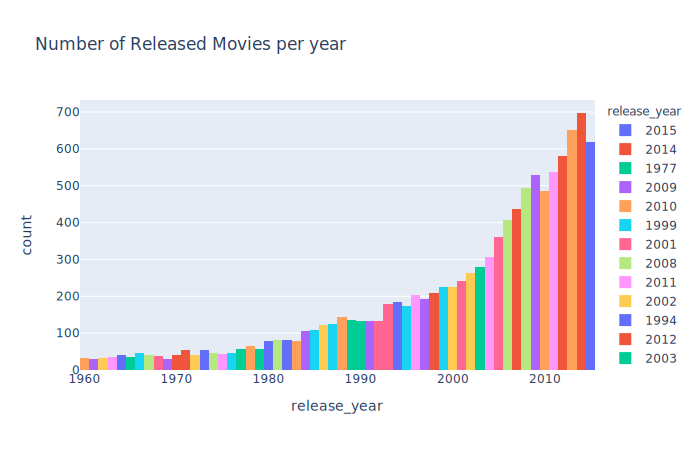

In [32]:
# Plotting a histogram for release year: 
fig2 = px.histogram(features_df, x='release_year',title = 'Number of Released Movies per year',color ='release_year')
fig2.show("svg")

**2014 has the most released movies with 696 Movies.**

### What are the most common genres in high rated movies?

First, we will check the average rating distribution

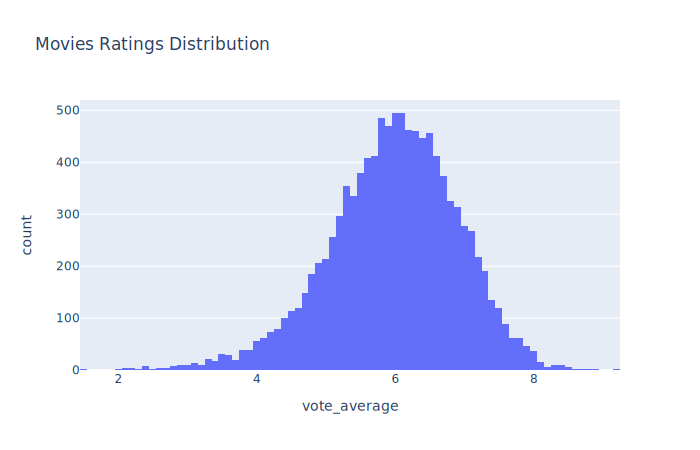

In [33]:
# Create a histogram for average rating:
fig3 = px.histogram(features_df, x = 'vote_average', title = 'Movies Ratings Distribution')
fig3.show("svg")

This is almost a normal distribution, so we will use the mean of ```vote_average``` to split the dataframe into ```high_rated``` and ```low_rated``` 

In [34]:
# Split the data set to high_rated and low_rated 
mean_rate = features_df.vote_average.mean()
high_rated = features_df[features_df['vote_average'] > mean_rate] 
low_rated = features_df[features_df['vote_average'] <= mean_rate] 

In [35]:
# Create new dataframe 'high_rated_gns' from joining high rated weth genres_df
high_rated_gns = high_rated.join(genres_df)

Now we will plot a histogram to show the most common genres in the high rated movies..

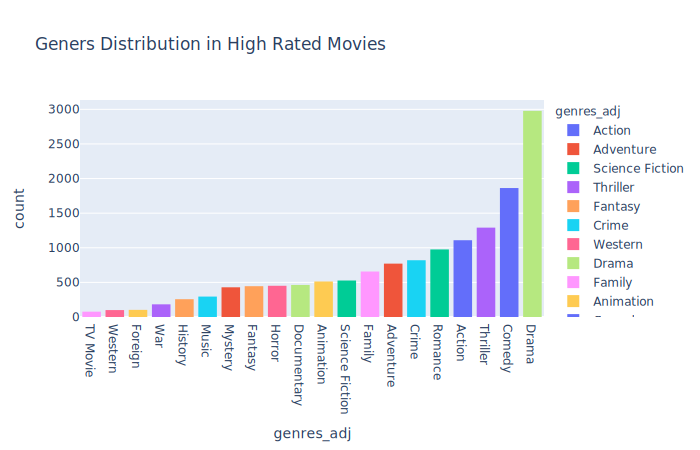

In [36]:
# Plotting a histogram to show the most common genres in the high rated movies.  
fig4 = px.histogram(high_rated_gns, x = 'genres_adj', color ='genres_adj', title = 'Geners Distribution in High Rated Movies').update_xaxes(categoryorder="total ascending")
fig4.show("svg")

The most common genres in high rated movies: 
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

### What are the most common genres in low rated movies?

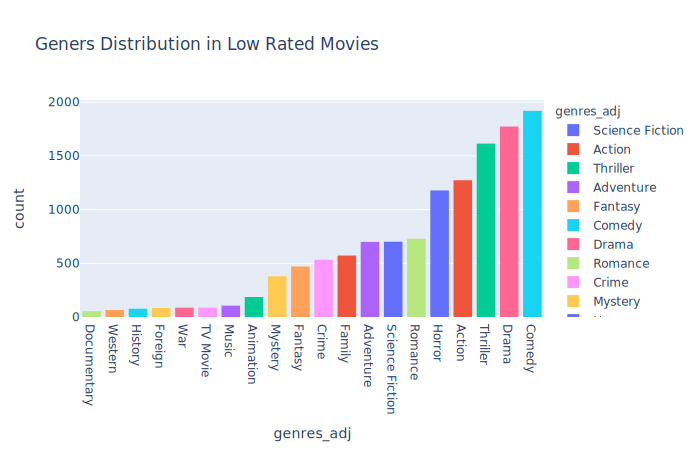

In [37]:
# Create new dataframe 'low_rated_gns' from joining high rated with genres_df
low_rated_gns = low_rated.join(genres_df)
fig5 = px.histogram(low_rated_gns, x = 'genres_adj', color ='genres_adj', title = 'Geners Distribution in Low Rated Movies').update_xaxes(categoryorder="total ascending")
fig5.show("svg")

The most common genres in low rated movies:

1. Comedy
2. Drama
3. Thriller
4. Action
5. Horror

### Is there a correlation between runtime and average rating?

Checking 'runtime' distribution: 

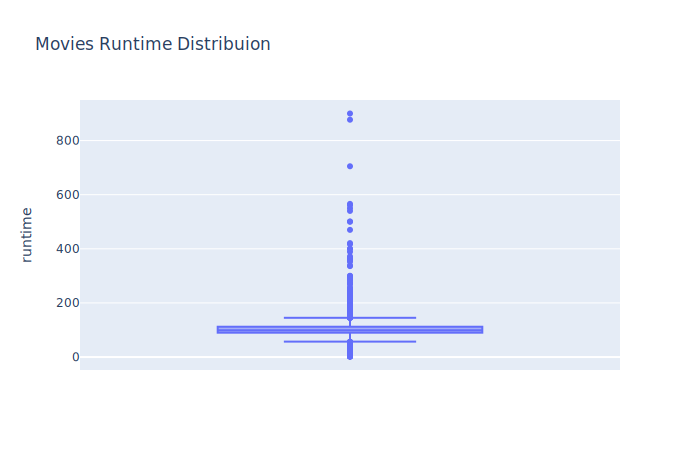

In [39]:
# Create a box plot to Check runtime distribution: 
fig6 = box_plot(features_df,'runtime','Movies Runtime Distribuion')
fig6

The distribution of runtime is right skewed.

The median of movies runtime is 99 mins.

50% of runtime values are between 90 mins and 112 mins.

There are many upper outliers and some lower outliers but they are ok to keep since thier values are associated with very long or very shot movies, and there is no reason to drop them from the dataset.

__

Now let's create a scatter plot to check the correlation between movies runtime and average rate

In [40]:
#Create a scatter plot to check the correlation between runtime and average rating..
##consider the vote count as the size and the color of the scatters..  
data = go.Scatter( x = features_df['vote_average'], y = features_df['runtime'], mode = 'markers',marker = dict(size = features_df['vote_count']/50, color = features_df['vote_count'],colorscale ='haline',showscale = True, opacity = .75), hovertext = features_df['original_title'])
layout = dict(title = 'Movies Runtime Against Average Rate',
                  xaxis = dict(title = 'Average Rate'),
                  yaxis = dict(title = 'Runtime'),
                  template = 'plotly_dark')
fig7 = go.Figure(data = data, layout =layout)
fig7.update_traces(marker_colorbar_title_text='vote_count', selector=dict(type='scatter'))
fig7.update_traces(marker_reversescale=True)
fig7.update_traces(customdata=features_df['vote_count'], selector=dict(type='scatter'))
fig7.show("svg")

**There is no correlation between movies average rate and movies runtime.**

***

<a id='conclusions'></a>
## Conclusions

### ```budget``` and ```revenue```  conclusions:
(Analysis of 3854 observations)

**1. There is no correlation between movies budget and movies revenues.**

**2. Movies revenues have continuously increased over the years, with HIGHST of 26.20 billion USD for 2015.**

### Other movies features conclusions:
(Analysis of 10812 observations)

**1. 2014 has the most released movies with 696 Movies.**

**2. The most common genres in high rated movies:**

* Drama
* Comedy
* Thriller
* Action
* Romance

**3. The most common genres in low rated movies:**

* Comedy
* Drama
* Thriller
* Action
* Horror

**4. There is no correlation between movies average rate and movies runtime.**

***

<a id='limitations'></a>
## Limitations: 
**1. Alot of missing values:**

* Due to a huge missing of values in ```revenue``` and ```budget``` columns, we had to make two seperate exploration analyses, one for budget and revenue correlations and the other is for other movies features correlations. 
    
* udget and revenue analysis was on 3854 rows of data, and the other analysis, while the other features analysis was on 10812 rows of data.

**2. Data entry typos:**

* In ```revenue``` and ```budget``` columns, we found alot of typos and errors, such as many values that were entered as ones instead of millions, we've tried to fix these issues as [documented](#typos) above. 

**3. Structural problems:**

* In ```genres``` column, many genres splitted by "|" was recorded as one value, that was a bad structure for our analysis, we tried to fix this issue as [documented](#genres) above. 

**4. A lot of outliers:**

* In many columns, such as ```popularity```, ```runtime```, and ```vote_count```, we found a lot of outliers that may have an impact on our analysis, for example: in ```runtime``` column we found very long movies and very short movies, and in ```popularity``` and ```vote_count``` we found so many extremely low numbers. Knowing what to do with those outliers is an important key to optimize our EDA. 

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1